Style transfer using VGG 19

In [2]:
import os
import sys
import image
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from utils import *
from functions import *
import numpy as np
import tensorflow as tf

In [2]:
%matplotlib inline

model = load_vgg_model("imagenet-vgg-verydeep-19.mat")

In [26]:
content_image = load_and_resize_image("images/test2.jpeg")
type(content_image)

numpy.ndarray

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


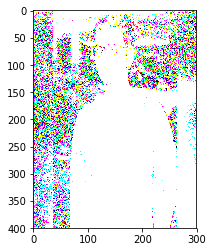

In [27]:
generated_image = generate_noise_image(content_image)
imshow(generated_image[0])

In [52]:
STYLE_LAYERS = [
    ('conv1_1', 0.5),
    ('conv2_1', 0.5),
    ('conv3_1', 0.5),
    ('conv4_1', 0.5),
    ('conv5_1', 0.5)]

In [53]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(3)
    J_content = np.random.randn()    
    J_style = np.random.randn()
    J = total_cost(J_content, J_style)
    print("J = " + str(J))

J = 35.34667875478276


In [54]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

C:\Users\Sushant Sinha\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [55]:
content_image = load_and_resize_image("images/test2.jpeg")
type(content_image)
content_image = reshape_and_normalize_image(content_image)
content_image.shape

(1, 400, 300, 3)

numpy.ndarray

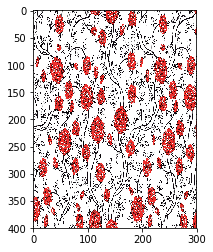

In [81]:
style_image =load_and_resize_image("images/test3.jpg")
style_image.shape
imshow(style_image)
style_image = reshape_and_normalize_image(style_image)
style_image.shape
type(style_image)

In [82]:
model = load_vgg_model("imagenet-vgg-verydeep-19.mat")
sess.run(model['input'].assign(content_image))

out = model['conv4_2']

a_C = sess.run(out)

a_G = out

J_content = compute_content_cost(a_C, a_G)

In [83]:
sess.run(model['input'].assign(style_image))

J_style = compute_style_cost(model, STYLE_LAYERS,sess)

In [84]:
J = total_cost(J_content, J_style,  alpha = 10, beta = 40)

In [85]:
optimizer = tf.train.AdamOptimizer(2.0)

train_step = optimizer.minimize(J)

In [86]:
model_nn(sess, generated_image,model,J,J_content,J_style,train_step)

Iteration 0 :
total cost = 199056500000.0
content cost = 14382.401
style cost = 4976409000.0
Iteration 20 :
total cost = 70868460000.0
content cost = 34980.324
style cost = 1771702800.0
Iteration 40 :
total cost = 35882830000.0
content cost = 44310.227
style cost = 897059800.0
Iteration 60 :
total cost = 21754782000.0
content cost = 47861.85
style cost = 543857540.0
Iteration 80 :
total cost = 14279023000.0
content cost = 50012.58
style cost = 356963070.0
Iteration 100 :
total cost = 9685144000.0
content cost = 51771.926
style cost = 242115630.0
Iteration 120 :
total cost = 6787780600.0
content cost = 53134.734
style cost = 169681230.0
Iteration 140 :
total cost = 4951075300.0
content cost = 54040.86
style cost = 123763380.0
Iteration 160 :
total cost = 3774381000.0
content cost = 54711.465
style cost = 94345850.0
Iteration 180 :
total cost = 3002139100.0
content cost = 55204.125
style cost = 75039680.0


array([[[[ -37.686592 ,  -47.66967  ,  -42.917004 ],
         [  94.869354 ,  -46.88945  ,    2.43745  ],
         [  72.09426  ,  -32.867783 ,   25.314644 ],
         ...,
         [  37.275272 ,   61.072605 ,   36.339535 ],
         [  59.036263 ,  100.34423  ,   77.04968  ],
         [  78.36367  ,  107.37598  ,   81.2502   ]],

        [[  37.29489  ,  -39.352097 ,   19.548964 ],
         [  85.926506 ,  143.02444  ,   66.02047  ],
         [  80.247185 ,   80.28496  ,   57.773815 ],
         ...,
         [  10.328626 ,  -27.649944 ,   17.8953   ],
         [  87.27788  ,  149.82535  ,   61.549576 ],
         [  65.837585 ,    7.1030583,   59.85902  ]],

        [[  55.601284 ,    6.8229413,   51.756046 ],
         [  71.98262  ,  171.33147  ,   70.24606  ],
         [  64.43341  ,  -18.458138 ,   62.89206  ],
         ...,
         [ -12.922148 ,  -28.160048 ,   41.041206 ],
         [ 103.71679  ,  203.6316   ,   60.758114 ],
         [  54.301125 ,  -12.498021 ,   60.490746 ]],

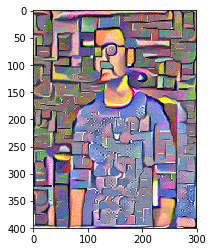

In [5]:
imshow(load_and_resize_image('output/generated_image.png'))